In [1]:
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, patches
import numpy as np
from tensorflow import keras
from IPython.display import HTML, Image

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

In [2]:
samples = 500

m = 2
xs = [i * m for i in range(samples)]
c = 50

ms = [m for _ in range(samples)]
cs = [c for _ in range(samples)]
ys = [m * x + c for x in xs]
noise = [random.randint(0,50) for _ in range(samples)]

data = {
    "ms": ms,
    "xs": xs,
    "cs": cs,
    "noise": noise, 
    "ys": ys
}

df = pd.DataFrame(data=data)
df.head(5)

,ms,xs,cs,noise,ys
0,2,0,50,31,50
1,2,2,50,1,54
2,2,4,50,12,58
3,2,6,50,20,62
4,2,8,50,46,66


In [3]:
columns = ["ms", "xs", "cs", "noise"]

X_train = df[columns]
y_train = df["ys"]

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=[4]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mean_squared_error")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = {
    "loss": [],
    0: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    1: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    2: {
        0: [],
        1: [],
        2: [],
        3: []
    },
    3: {
        0: [],
        1: [],
        2: [],
        3: []
    }, 
}

In [6]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(X_train, y_train, epochs=1)
    history["loss"].append(hist.history["loss"])
    all_weights = model.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1
16/16 [==============================] - 0s 6ms/step - loss: 295077.6875
RUNNING EPOCH 2
16/16 [==============================] - 0s 5ms/step - loss: 246444.9062
RUNNING EPOCH 3
16/16 [==============================] - 0s 5ms/step - loss: 203026.0312
RUNNING EPOCH 4
16/16 [==============================] - 0s 5ms/step - loss: 166041.1094
RUNNING EPOCH 5
16/16 [==============================] - 0s 5ms/step - loss: 133812.1719
RUNNING EPOCH 6
16/16 [==============================] - 0s 5ms/step - loss: 106915.6719
RUNNING EPOCH 7
16/16 [==============================] - 0s 5ms/step - loss: 84432.7812
RUNNING EPOCH 8
16/16 [==============================] - 0s 5ms/step - loss: 65812.4297
RUNNING EPOCH 9
16/16 [==============================] - 0s 5ms/step - loss: 50941.2812
RUNNING EPOCH 10
16/16 [==============================] - 0s 5ms/step - loss: 38476.7930
RUNNING EPOCH 11
16/16 [==============================] - 0s 5ms/step - loss: 28794.6777
RUNNING EPOCH 12
16/16 [

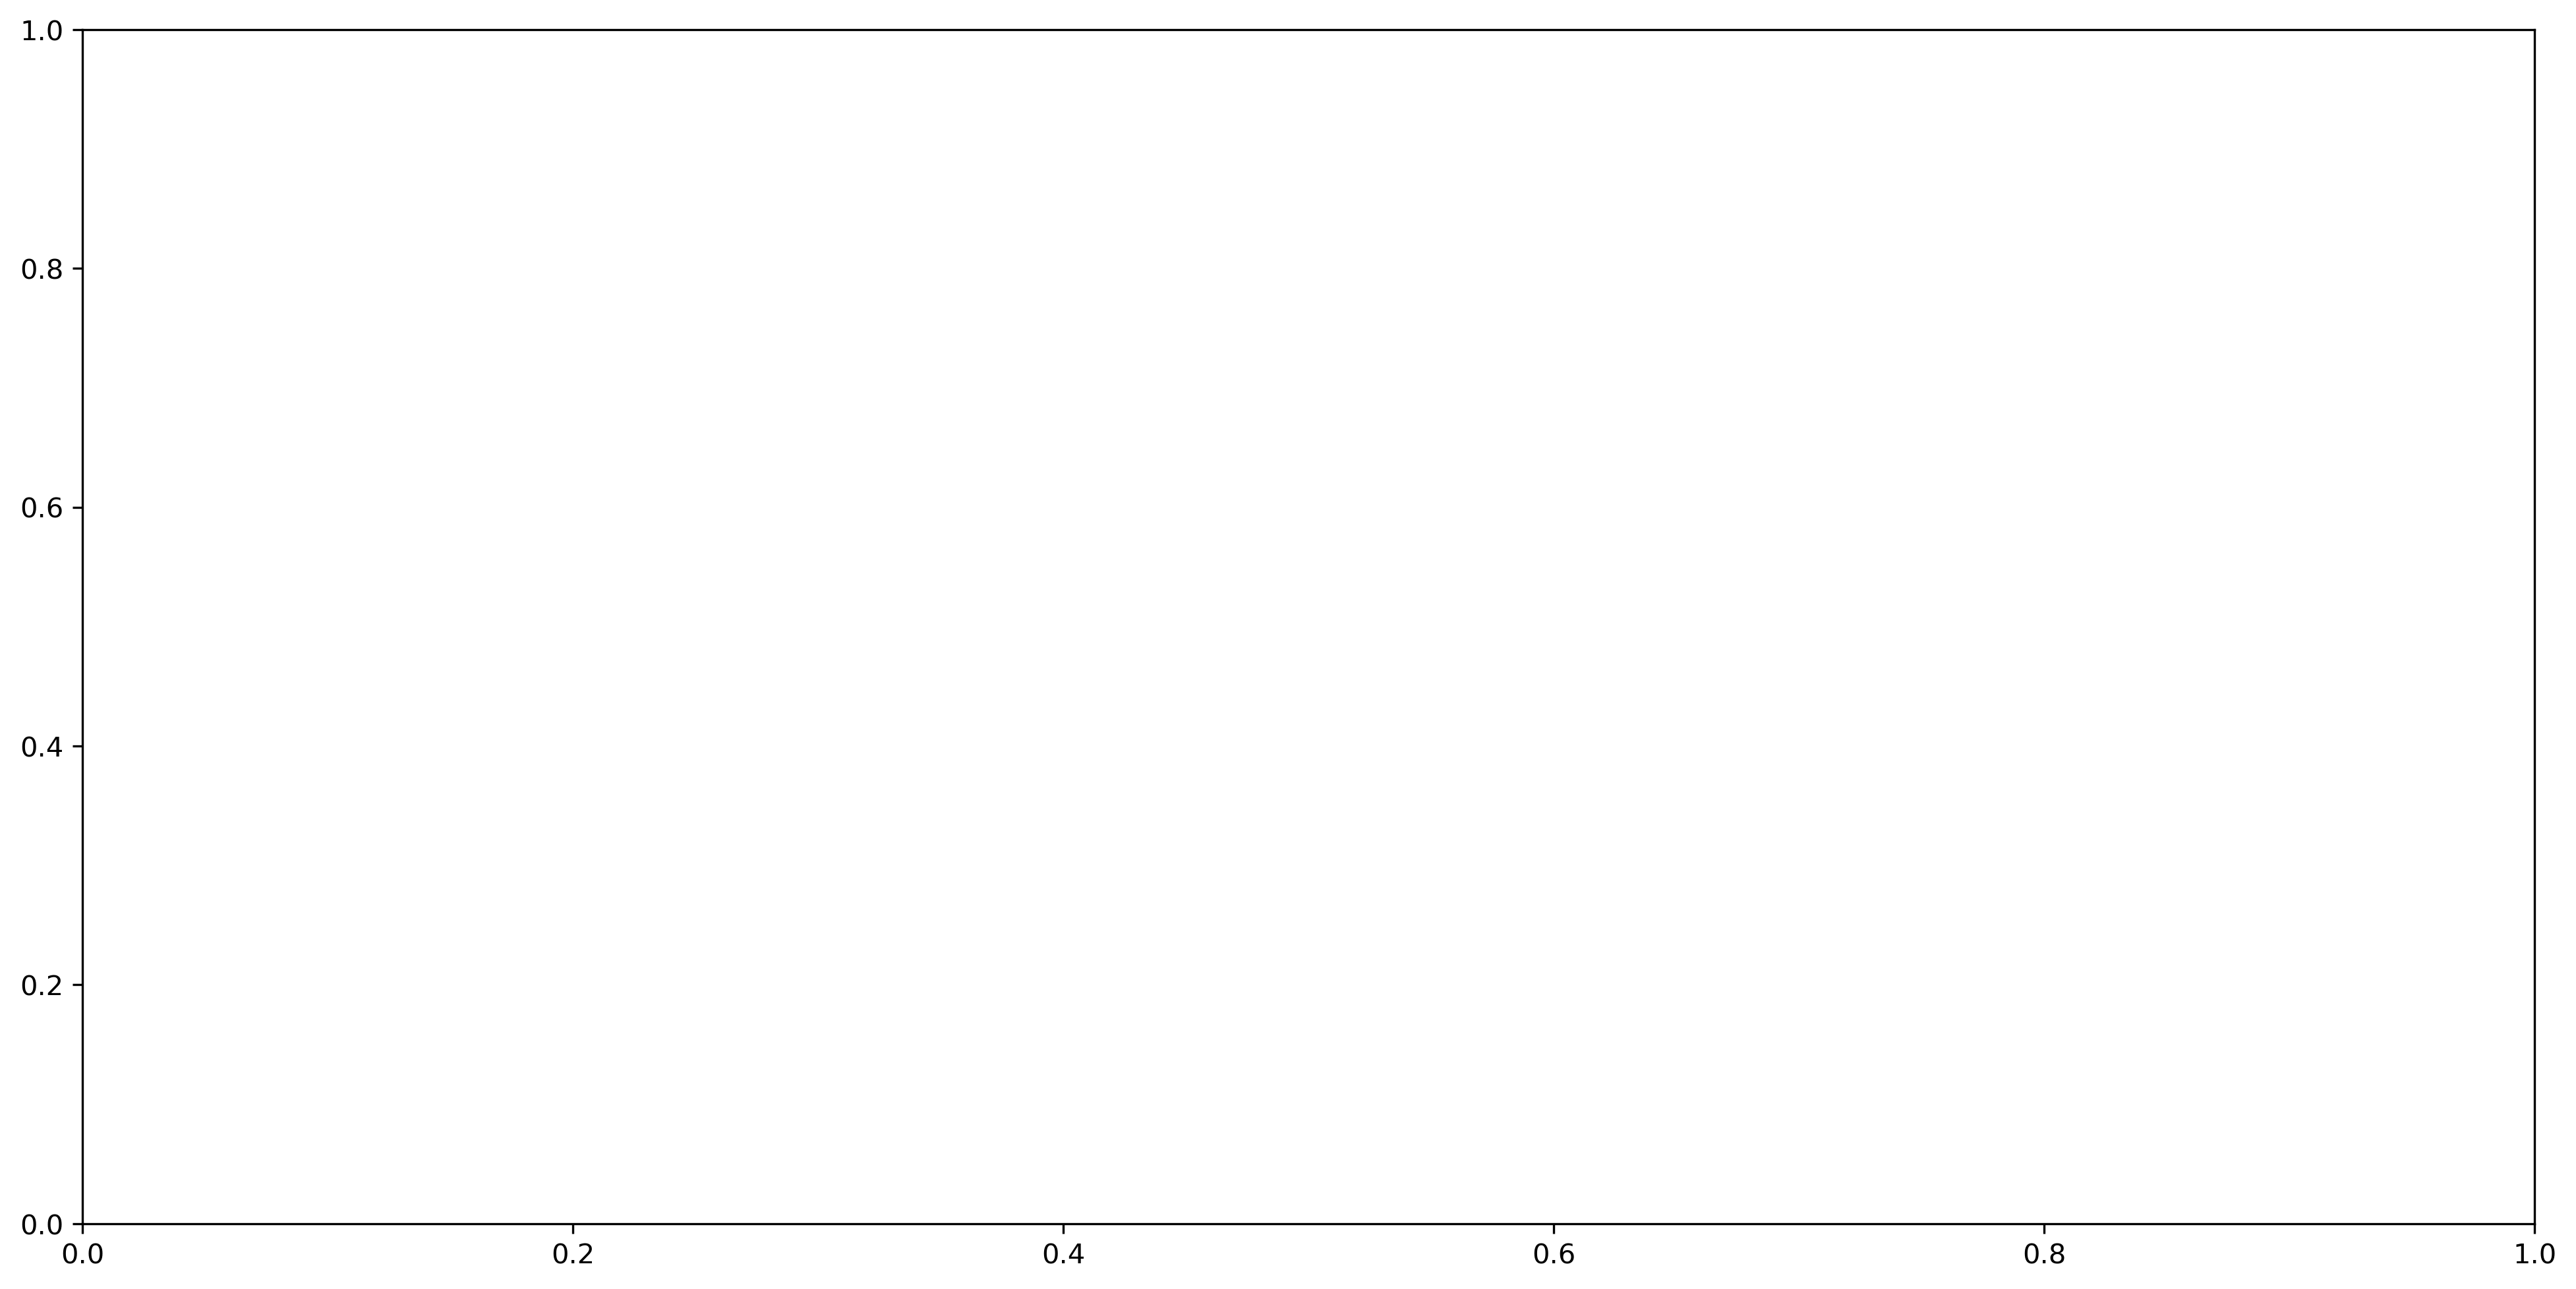

In [17]:
frames = 250
fig, ax = plt.subplots(figsize=(16,8))
def run(i):
  i = i + 249
  ax.cla()
  ax.set_ylim(-1.5, 1.5)
  m_one = history[0][0][i]
  m_two = history[0][1][i]
  m_three = history[0][2][i]
  m_four = history[0][3][i]
  
  x_one = history[1][0][i]
  x_two = history[1][1][i]
  x_three = history[1][2][i]
  x_four = history[1][3][i]

  c_one = history[2][0][i]
  c_two = history[2][1][i]
  c_three = history[2][2][i]
  c_four = history[2][3][i]

  noise_one = history[3][0][i]
  noise_two = history[3][1][i]
  noise_three = history[3][2][i]
  noise_four = history[3][3][i]
  ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      m_one, m_two, m_three, m_four,
      x_one, x_two, x_three, x_four,
      c_one, c_two, c_three, c_four,
      noise_one, noise_two, noise_three, noise_four,
    ],
    color=[
      "r", "r", "r", "r",
      "g", "g", "g", "g",
      "y", "y", "y", "y", 
      "b", "b", "b", "b"
    ]
  )

anim = animation.FuncAnimation(fig, run, frames=frames, interval=50)

In [9]:
HTML(anim.to_html5_video())

In [10]:
x_check = history[1][2].copy()
noise_check = history[3][2].copy()

In [11]:
x_range = sorted(x_check)[-1] - sorted(x_check)[0]
x_range

0.142787367105484

In [12]:
noise_range = sorted(noise_check)[-1] - sorted(noise_check)[0]
noise_range

0.29443618655204773

In [13]:
len(x_check)

500

''

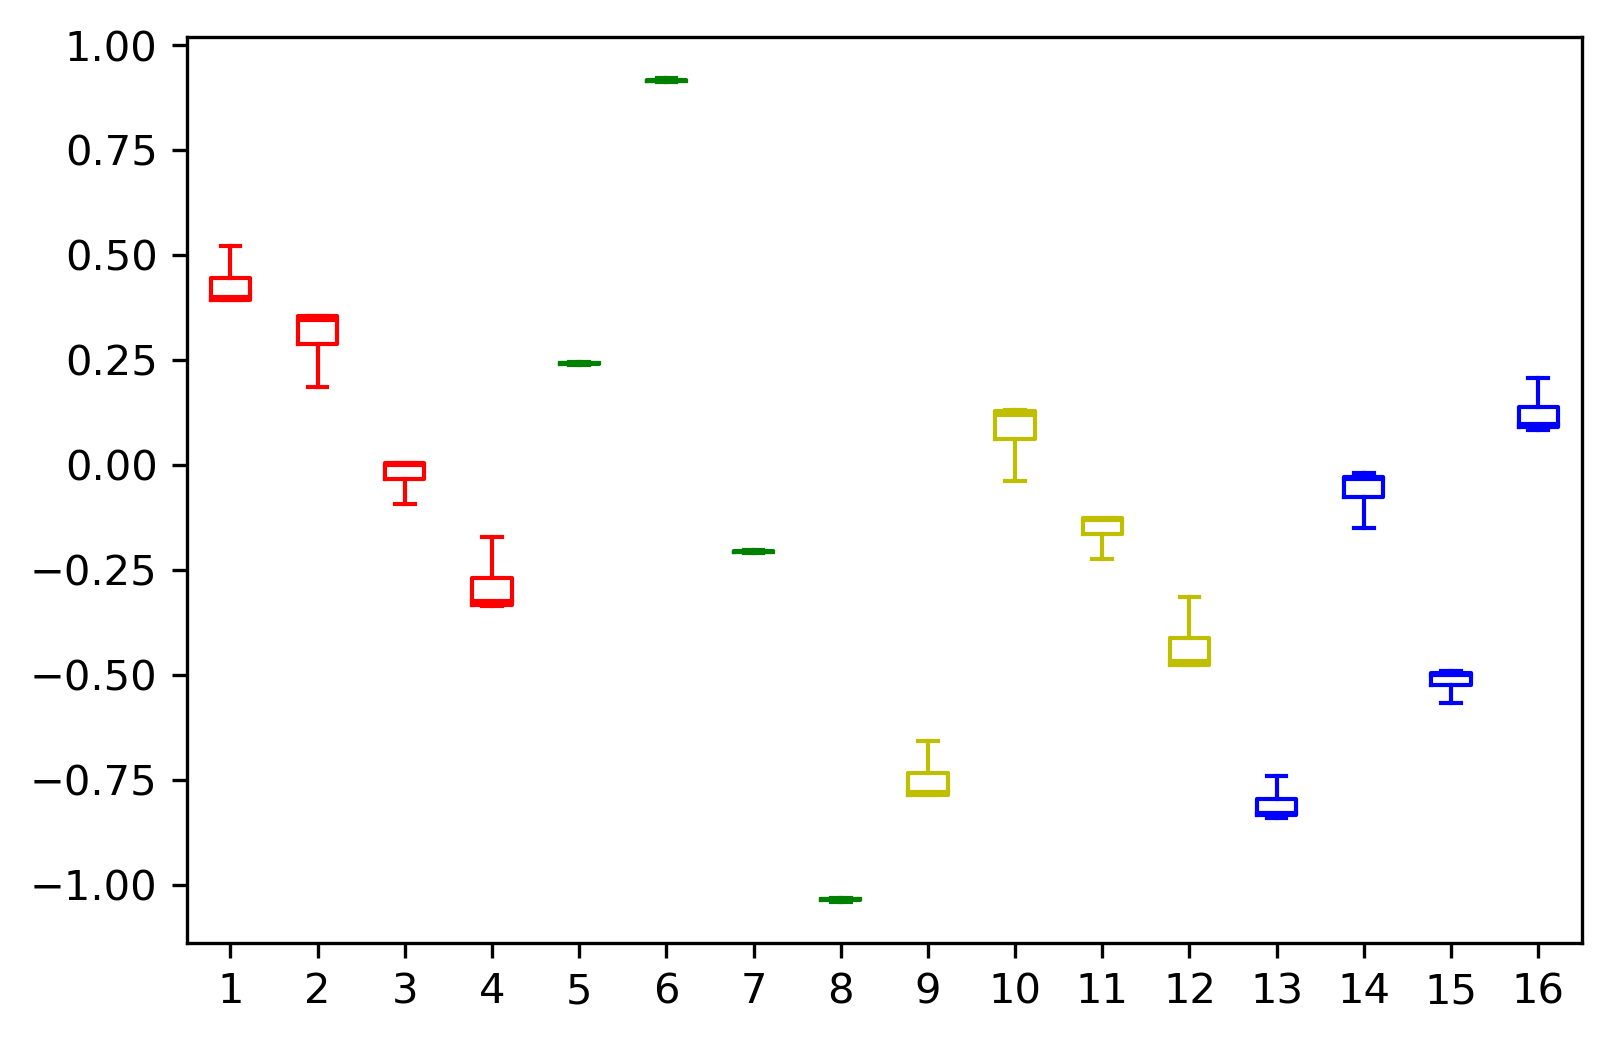

In [15]:
start_index = 0
# Change to start half way

fig, ax = plt.subplots()
m_one = history[0][0][start_index:]
m_two = history[0][1][start_index:]
m_three = history[0][2][start_index:]
m_four = history[0][3][start_index:]

x_one = history[1][0][start_index:]
x_two = history[1][1][start_index:]
x_three = history[1][2][start_index:]
x_four = history[1][3][start_index:]

c_one = history[2][0][start_index:]
c_two = history[2][1][start_index:]
c_three = history[2][2][start_index:]
c_four = history[2][3][start_index:]

noise_one = history[3][0][start_index:]
noise_two = history[3][1][start_index:]
noise_three = history[3][2][start_index:]
noise_four = history[3][3][start_index:]

m_color = {
    "color": "r"
}
x_color = {
    "color": "g"
}
c_color = {
    "color": "y"
}
noise_color = {
    "color": "b"
}

ax.boxplot(
    [m_one, m_two, m_three, m_four],
    positions=[1,2,3,4],
    boxprops=m_color,
    medianprops=m_color,
    whiskerprops=m_color,
    capprops=m_color,
    showfliers=False
)
ax.boxplot(
    [x_one, x_two, x_three, x_four],
    positions=[5,6,7,8],
    boxprops=x_color,
    medianprops=x_color,
    whiskerprops=x_color,
    capprops=x_color,
    showfliers=False
)
ax.boxplot(
    [c_one, c_two, c_three, c_four],
    positions=[9,10,11,12],
    boxprops=c_color,
    medianprops=c_color,
    whiskerprops=c_color,
    capprops=c_color,
    showfliers=False
)
ax.boxplot(
    [noise_one, noise_two, noise_three, noise_four],
    positions=[13,14,15,16],
    boxprops=noise_color,
    medianprops=noise_color,
    whiskerprops=noise_color,
    capprops=noise_color,
    showfliers=False
)
;